In [1]:
from sklearn import *
import pandas as pd


In [3]:
# Read textfiles into dataframes
df_smoker = pd.read_csv('./data/internal_smokerslung.expression.txt', sep="\t", index_col=0).transpose()
df_non_smoker = pd.read_csv('./data/internal_nonsmokerslung.expression.txt', sep="\t", index_col=0).transpose()
# df_smoker = df_smoker.reset_index(drop=True);
# df_non_smoker = df_non_smoker.reset_index(drop=True);
print ("DF SMOKER");
print(df_smoker);
print("DF NON-SMOKER");
print(df_non_smoker);

DF SMOKER
                     ACE2  TMPRSS2  IL6R  IL6ST  PCSK1   IL6  PCSK2  CTSE  \
1B_neg_cell111_HU48   0.0      0.0   0.0    0.0    0.0   0.0    0.0   0.0   
1B_neg_cell292_HU48   0.0      0.0   0.0    4.0    0.0  14.0    0.0   0.0   
1B_neg_cell448_HU48   0.0      0.0   0.0    0.0    0.0  20.0    0.0   0.0   
1B_neg_cell449_HU48   0.0      0.0   1.0    0.0    0.0   1.0    0.0   0.0   
1B_neg_cell503_HU48   0.0      0.0   0.0    0.0    0.0   0.0    0.0   0.0   
...                   ...      ...   ...    ...    ...   ...    ...   ...   
RBI_cell735720_HU40   0.0      0.0   0.0    3.0    0.0   0.0    0.0   0.0   
RBI_cell736255_HU40   0.0      1.0   0.0    3.0    0.0   0.0    0.0   0.0   
RBI_cell736309_HU40   0.0      0.0   0.0    0.0    0.0   0.0    0.0   0.0   
RBI_cell736406_HU40   0.0      0.0   0.0    0.0    0.0   0.0    0.0   0.0   
RBI_cell736746_HU40   0.0      0.0   1.0    1.0    0.0   0.0    0.0   0.0   

                     MYRF  MAG  ...  PCSK7  C1R   C2   C3   C5  C

In [4]:
# countnumber of smoker and non-smoker samples
n_smoker = len(df_smoker)
n_non_smoker = len(df_non_smoker)
print(n_smoker);
print(n_non_smoker);
# resample the non-smoker data to have the same number of samples as the smoker data
df_non_smoker_resampled = df_non_smoker.sample(n=n_smoker, replace=False, random_state=42);
# label the data as smoke=yes or smoke=no in both dataframes
df_smoker['smoker'] = 'yes';
df_non_smoker_resampled['smoker'] = 'no';
# combine the data frames
df_combo_balanced = pd.concat([df_smoker, df_non_smoker_resampled], axis=0);
X = df_combo_balanced.drop(['smoker'], axis=1)
y = df_combo_balanced['smoker']
print('BALANCED');
print(X);

96786
277224
BALANCED
                          ACE2  TMPRSS2  IL6R  IL6ST  PCSK1   IL6  PCSK2  \
1B_neg_cell111_HU48        0.0      0.0   0.0    0.0    0.0   0.0    0.0   
1B_neg_cell292_HU48        0.0      0.0   0.0    4.0    0.0  14.0    0.0   
1B_neg_cell448_HU48        0.0      0.0   0.0    0.0    0.0  20.0    0.0   
1B_neg_cell449_HU48        0.0      0.0   1.0    0.0    0.0   1.0    0.0   
1B_neg_cell503_HU48        0.0      0.0   0.0    0.0    0.0   0.0    0.0   
...                        ...      ...   ...    ...    ...   ...    ...   
RUL_cell5440118_HU52       0.0      0.0   0.0    0.0    0.0   0.0    0.0   
1BP1_cell731151_HU30       0.0      0.0   0.0    0.0    0.0   9.0    0.0   
RPL2_neg_cell130712_HU49   0.0      1.0   0.0    0.0    0.0   0.0    0.0   
1BP2_cell509286_HU30       0.0      0.0   0.0    2.0    0.0   0.0    0.0   
1BP2_cell380992_HU30       0.0      0.0   0.0    1.0    0.0   0.0    0.0   

                          CTSE  MYRF  MAG  ...  PCSK7   C1R   C2 

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
import numpy as np
# Encode the target using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
X
# log_transformer = FunctionTransformer(np.log1p) # np.log1p computes the natural log of x + 1
# log_transformer.transform(X)


,ACE2,TMPRSS2,IL6R,IL6ST,PCSK1,IL6,PCSK2,CTSE,MYRF,MAG,...,PCSK7,C1R,C2,C3,C5,CFI,CTSS,CTSL,CTSB,CTSC
1B_neg_cell111_HU48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,6.0
1B_neg_cell292_HU48,0.0,0.0,0.0,4.0,0.0,14.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,16.0,5.0
1B_neg_cell448_HU48,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0
1B_neg_cell449_HU48,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,5.0,0.0,8.0,0.0
1B_neg_cell503_HU48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RUL_cell5440118_HU52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1BP1_cell731151_HU30,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
RPL2_neg_cell130712_HU49,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,2.0,1.0,5.0,3.0
1BP2_cell509286_HU30,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


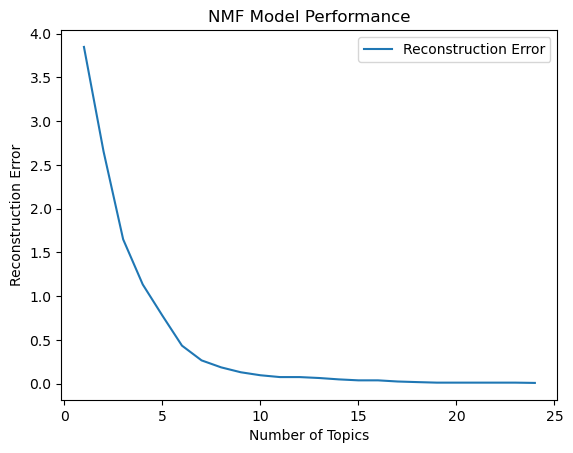

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

# define the range of number of topics to test
n_topics_range = range(1,25)

# initialize array to store reconstruction error for each number of topics
recon_error = np.zeros(len(n_topics_range))

# loop through the range of number of topics
for i, n_topics in enumerate(n_topics_range):
    # fit NMF model with the specified number of topics
    model = NMF(n_components=n_topics, init="random", random_state=0, max_iter=1000)
    W = model.fit_transform(X)
    H = model.components_

    # calculate reconstruction error
    recon_error[i] = mean_squared_error(X, np.dot(W, H))
# plot the reconstruction error as a function of the number of topics
fig, ax = plt.subplots()
ax.plot(n_topics_range, recon_error, label='Reconstruction Error')
ax.set_xlabel('Number of Topics')
ax.set_ylabel('Reconstruction Error')
ax.set_title('NMF Model Performance')
ax.legend()
plt.show()



In [17]:
# Apply Topic Modelling NMF with 8 topics
from sklearn.metrics import silhouette_score
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error

n_topics = 8
model = NMF(n_components=n_topics, init="random", random_state=0)
W = model.fit_transform(X)
H = model.components_

# Identify the topic with highest weight for each cell
cell_topics = [W[i].argmax() for i in range(W.shape[0])]

# Print the top 8 genes in each topic
top_genes = 8
for topic_idx, topic in enumerate(H):
    print(f"Topic {topic_idx + 1}:")
    print(", ".join([X.columns[i] for i in topic.argsort()[:-top_genes - 1:-1]]))
    print()

display(pd.DataFrame(W))
display(pd.DataFrame(H))


Topic 1:
C3, CFI, C2, CTSE, TMPRSS2, MBP, PCSK7, FURIN

Topic 2:
CTSC, IL6ST, PCSK7, PCSK5, PCSK1, C3, ACE2, PLP1

Topic 3:
C1R, IL6ST, PCSK5, CFI, C3, CTSB, PCSK1, MAG

Topic 4:
CTSL, CTSB, IL6ST, C3, PCSK1, CTSS, MAG, CTSC

Topic 5:
IL6, IL6ST, PCSK5, CFI, PCSK7, FURIN, C3, PCSK1

Topic 6:
IL6ST, C2, PCSK7, TMPRSS2, MBP, CFI, FURIN, IL6R

Topic 7:
CTSS, C2, TMPRSS2, MBP, IL6R, PCSK5, FURIN, CTSE

Topic 8:
CTSB, MBP, PCSK7, FURIN, IL6R, PCSK5, MYRF, CTSC



,0,1,2,3,4,5,6,7
0,0.000000,1.031133,0.009407,0.075117,0.000450,0.000000,0.000247,0.347425
1,0.459713,0.856894,0.513671,0.000000,2.447072,2.125466,0.106764,1.417101
2,0.011721,0.000000,0.000000,0.000000,3.489314,0.000000,0.112382,0.174782
3,0.993181,0.000000,0.000000,0.000000,0.173961,0.000000,0.561606,0.700001
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
193567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
193568,0.000000,0.342271,0.491476,0.000000,1.569210,0.000000,0.000000,0.087229
193569,0.039642,0.509079,0.473362,0.073497,0.000000,0.580394,0.242219,0.433393
193570,0.000000,0.000000,8.048458,0.000000,0.000000,0.741262,0.000000,0.441273


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.001990,0.030924,0.016362,0.000000,0.000000,0.000000,0.004433,0.077103,0.015336,0.000000,...,0.023037,0.000705,0.084734,1.977409,0.008022,0.098294,0.000000,0.000000,0.000000,0.000000
1,0.001513,0.000000,0.000000,0.150159,0.009081,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.029901,0.000000,0.000000,0.008329,0.000000,0.000000,0.000000,0.000000,0.000000,5.806085
2,0.000000,0.000000,0.000000,0.103298,0.001521,0.000000,0.000000,0.000000,0.000000,0.000769,...,0.000000,1.984625,0.000000,0.030964,0.000000,0.044048,0.000000,0.000000,0.001667,0.000000
3,0.000000,0.000000,0.000000,0.301482,0.013916,0.000000,0.000000,0.000000,0.000000,0.002440,...,0.000000,0.000000,0.000000,0.016903,0.000000,0.000000,0.012062,13.262592,0.451167,0.000000
4,0.000000,0.000000,0.000000,0.171079,0.002902,5.727241,0.000000,0.000000,0.000000,0.000120,...,0.018359,0.000000,0.000000,0.003770,0.000000,0.027567,0.000000,0.000000,0.000000,0.000000
5,0.004225,0.212608,0.102599,1.486688,0.001743,0.000000,0.049355,0.075220,0.011423,0.000386,...,0.265273,0.000000,0.616717,0.000000,0.062932,0.163453,0.000000,0.000000,0.000000,0.000000
6,0.009056,0.277025,0.120529,0.000000,0.000000,0.000000,0.018312,0.046353,0.001319,0.000277,...,0.000000,0.000514,0.467804,0.000000,0.043183,0.038670,8.855823,0.012567,0.000000,0.015955
7,0.011698,0.014010,0.090184,0.000000,0.000000,0.000000,0.000000,0.000000,0.034403,0.000000,...,0.431932,0.000000,0.000000,0.000000,0.010367,0.026705,0.000000,0.000000,11.386031,0.027142


hiiii
        ACE2  TMPRSS2  IL6R  IL6ST  PCSK1   IL6  PCSK2  CTSE  MYRF  MAG  ...  \
0        0.0      0.0   0.0    0.0    0.0   0.0    0.0   0.0   0.0  0.0  ...   
1        0.0      0.0   0.0    4.0    0.0  14.0    0.0   0.0   0.0  0.0  ...   
2        0.0      0.0   0.0    0.0    0.0  20.0    0.0   0.0   0.0  0.0  ...   
3        0.0      0.0   1.0    0.0    0.0   1.0    0.0   0.0   0.0  0.0  ...   
4        0.0      0.0   0.0    0.0    0.0   0.0    0.0   0.0   0.0  0.0  ...   
...      ...      ...   ...    ...    ...   ...    ...   ...   ...  ...  ...   
193567   0.0      0.0   0.0    0.0    0.0   0.0    0.0   0.0   0.0  0.0  ...   
193568   0.0      0.0   0.0    0.0    0.0   9.0    0.0   0.0   0.0  0.0  ...   
193569   0.0      1.0   0.0    0.0    0.0   0.0    0.0   0.0   0.0  0.0  ...   
193570   0.0      0.0   0.0    2.0    0.0   0.0    0.0   0.0   0.0  0.0  ...   
193571   0.0      0.0   0.0    1.0    0.0   0.0    0.0   0.0   0.0  0.0  ...   

         C1R   C2   C3   C5  CFI 

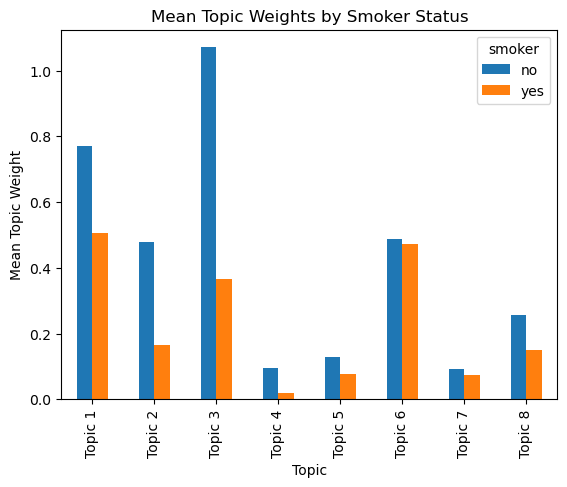

In [38]:
import matplotlib.pyplot as plt
# wilcoxon results for each topic
from scipy.stats import ranksums
df_combo_balanced = df_combo_balanced.reset_index(drop=True)
Wdf = pd.concat([pd.DataFrame(W, columns=[f"Topic {i+1}" for i in range(n_topics)]), df_combo_balanced["smoker"].reset_index(drop=True)], axis=1)
print("hiiii")
print(df_combo_balanced);
print(W)
p_values = []
for i in range(n_topics):
    smoker_weights = Wdf.loc[Wdf["smoker"] == "yes", f"Topic {i+1}"]
    non_smoker_weights = Wdf.loc[Wdf["smoker"] == "no", f"Topic {i+1}"]
    _, p_value = ranksums(smoker_weights, non_smoker_weights)
    p_values.append(p_value)
print(p_values)

mean_weights = Wdf.groupby("smoker").mean().T

# Plot a grouped bar graph with two bars per topic for each group
fig, ax = plt.subplots()
mean_weights.plot(kind="bar", ax=ax)
ax.set_xlabel("Topic")
ax.set_ylabel("Mean Topic Weight")
ax.set_title("Mean Topic Weights by Smoker Status")
plt.show()

# asterisks for significant differences
for i, (bar1, bar2) in enumerate(zip(ax.containers[::2], ax.containers[1::2])):
    height1 = [bar.get_height() for bar in bar1]
    height2 = [bar.get_height() for bar in bar2]
    diff_height = [h2 - h1 for h1, h2 in zip(height1, height2)]
    sig_topics = [j for j, p in enumerate(p_values) if p < 0.001]
    sig_diff_height = [diff_height[j] for j in sig_topics]
    sig_x = [j + i * (n_topics * 2 + 1) / 2 for j in sig_topics]
    for x, h in zip(sig_x, sig_diff_height):
        ax.annotate("*", xy=(x, max(height1 + height2)), ha="center", va="bottom", fontsize=16)
plt.show()



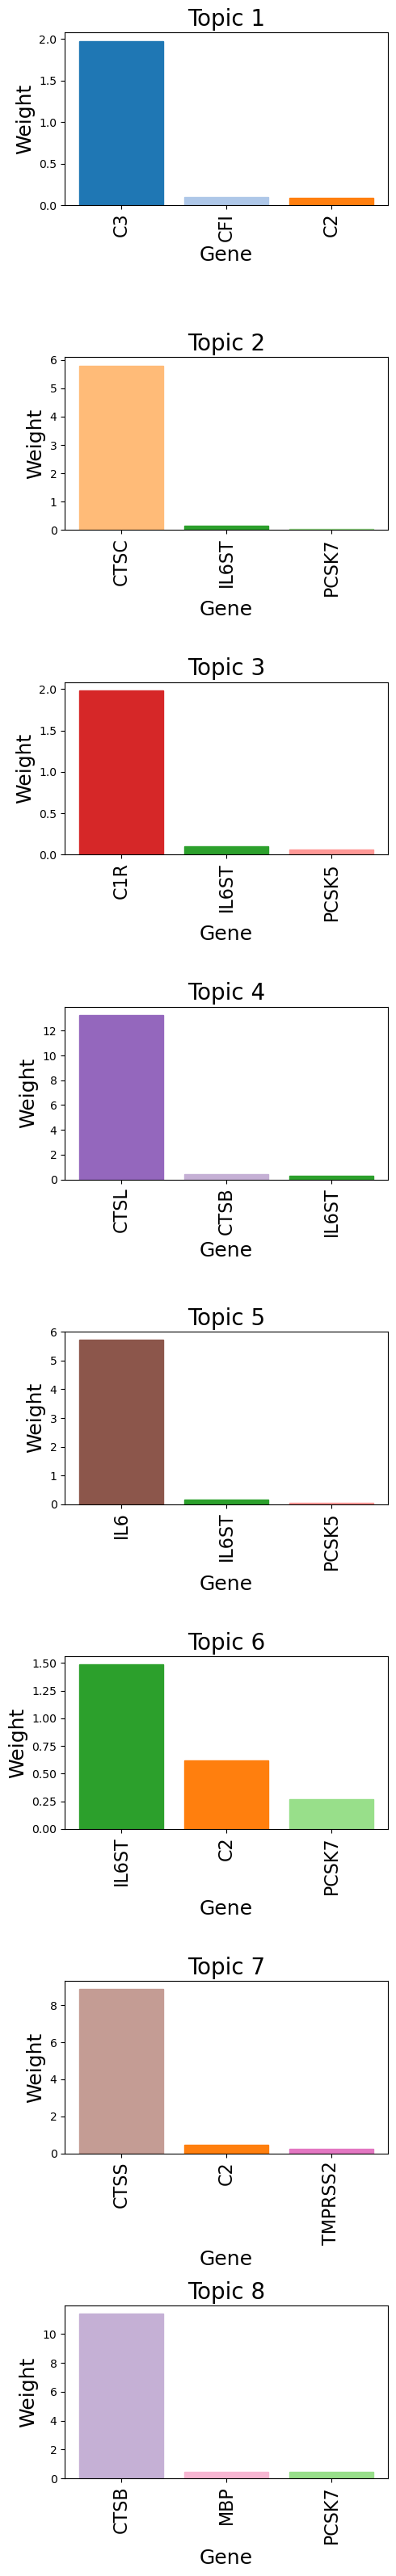

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Set the number of top genes to show
n_top_genes = 3

# Define a dictionary to keep track of gene colors
gene_colors = {}

# Plot a vertical bar chart for each topic
n_topics = H.shape[0]
fig, ax = plt.subplots(n_topics, 1, figsize=(5, 4*n_topics))
fig.subplots_adjust(hspace=0.5)
for topic_idx, topic in enumerate(H):
    # Get the indices of the top genes in this topic
    top_gene_indices = topic.argsort()[-n_top_genes:][::-1]

    # Get the names and expression values of the top genes
    top_gene_names = [X.columns[i] for i in top_gene_indices]
    top_gene_values = topic[top_gene_indices]

    # Plot a vertical bar chart for this topic
    x_pos = np.arange(n_top_genes)
    ax[topic_idx].bar(x_pos, top_gene_values, align='center')
    ax[topic_idx].set_xticks(x_pos)
    ax[topic_idx].set_xticklabels(top_gene_names, rotation=90,  fontsize=16)
    ax[topic_idx].set_xlabel('Gene', fontsize=18)
    ax[topic_idx].set_ylabel('Weight', fontsize=18)
    ax[topic_idx].set_title('Topic {}'.format(topic_idx+1), fontsize=20)

    # Set the color of genes that occur in multiple topics
    for gene_name in top_gene_names:
        if gene_name in gene_colors:
            ax[topic_idx].get_children()[top_gene_names.index(gene_name)].set_color(gene_colors[gene_name])
        else:
            gene_colors[gene_name] = plt.get_cmap('tab20')(len(gene_colors))
            ax[topic_idx].get_children()[top_gene_names.index(gene_name)].set_color(gene_colors[gene_name])

plt.tight_layout()
plt.show()


In [40]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.49870849979335996


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42);

svm_model = svm.SVC(kernel='linear', probability=False);

scores = cross_val_score(svm_model, X_train, y_train, cv=5);
print(scores);

In [34]:
import pandas as pd
from gensim import corpora, models

# Load data and transpose

df = df_combo_balanced
df.index.name = 'Cell_Type'
df = df.applymap(str)
dictionary = corpora.Dictionary(df.values)

# create a corpus
corpus = [dictionary.doc2bow(row) for row in df.values]

# define the number of topics
num_topics = 8

# create an empty list to store the topics for each row
topics = []

# run LDA for each row/document
for i in range(len(df)):
    lda_model = models.LdaModel(corpus=[corpus[i]], id2word=dictionary, num_topics=num_topics)
    topics.append(lda_model.print_topics())
print(len(df))
# print the topics for each cell type
for i, row in enumerate(df.index):
    print(f"Cell Type: {row}")
    for j, topic in enumerate(topics[i]):
        print(f"Topic {j}: {topic}")
    print()




IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

